In [1]:
from binance.client import Client

client = Client()

klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_3DAY, "5 months ago UTC")

In [2]:
print(type(klines))
print(klines)

<class 'list'>
[[1709251200000, '3340.10000000', '3491.80000000', '3338.54000000', '3487.81000000', '1038405.05310000', 1709510399999, '3549325416.00839300', 3306066, '506855.10330000', '1732882745.53972300', '0'], [1709510400000, '3487.80000000', '3900.00000000', '3200.00000000', '3818.59000000', '3077760.21010000', 1709769599999, '11223003645.90040700', 7774808, '1517974.54470000', '5539416940.75979000', '0'], [1709769600000, '3818.58000000', '3993.75000000', '3735.00000000', '3905.21000000', '1442019.07250000', 1710028799999, '5597641525.76282700', 4113192, '723574.32460000', '2809188594.95655600', '0'], [1710028800000, '3905.20000000', '4093.92000000', '3722.95000000', '3979.96000000', '1711006.58800000', 1710287999999, '6790010681.36858900', 4968525, '819900.57740000', '3252790173.83131100', '0'], [1710288000000, '3979.97000000', '4083.00000000', '3570.00000000', '3742.19000000', '2078080.70820000', 1710547199999, '7967394801.31377300', 5943798, '1025509.65500000', '3934737284.488

In [3]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt


df = pd.DataFrame(klines, 
                 columns = ["open_time","open","high","low","close","vol","close_time","quote_vol",\
                            "trades","taker_base_vol","taker_quote_vol","ignore"])

df = df[["open_time","open","high","low","close"]]

df["open_time"] = pd.to_datetime(df["open_time"], unit = "ms")

df["open"] = df.open.astype(float)
df["high"] = df.high.astype(float)
df["low"] = df.low.astype(float)
df["close"] = df.close.astype(float)

## Take the rolling atr so the yaxis doesn't shake too much
df["atr"] = ta.atr(high=df.high, low=df.low, close=df.close)
df["atr"] = df.atr.rolling(window=30).mean()

df.set_index("open_time", inplace = True)

# print(df["atr"])
# plt.plot(df["close"], c='grey')
# plt.plot(df["atr"], c='grey')

print(df[:5])
print(df[-5:])

               open     high      low    close  atr
open_time                                          
2024-03-01  3340.10  3491.80  3338.54  3487.81  NaN
2024-03-04  3487.80  3900.00  3200.00  3818.59  NaN
2024-03-07  3818.58  3993.75  3735.00  3905.21  NaN
2024-03-10  3905.20  4093.92  3722.95  3979.96  NaN
2024-03-13  3979.97  4083.00  3570.00  3742.19  NaN
               open     high      low    close         atr
open_time                                                 
2024-07-14  3175.93  3498.59  3163.67  3444.13  304.380116
2024-07-17  3444.14  3540.27  3367.20  3503.53  300.341431
2024-07-20  3503.53  3562.82  3411.40  3439.60  296.817834
2024-07-23  3439.61  3541.00  3087.53  3175.48  294.231977
2024-07-26  3175.47  3327.59  3171.00  3273.98  291.548593


# Plotting Price Data

In [4]:
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
pd.set_option('mode.chained_assignment', None)
print(len(df))

50


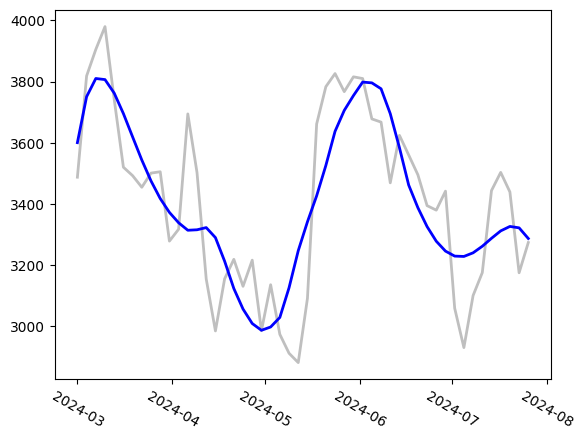

In [200]:
smoothness = 25

df["close_smooth"] = savgol_filter(df.close, smoothness, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df.index, df.close_smooth, c='b', lw=2, zorder=5)

plt.show()

#  Detecting Extrema

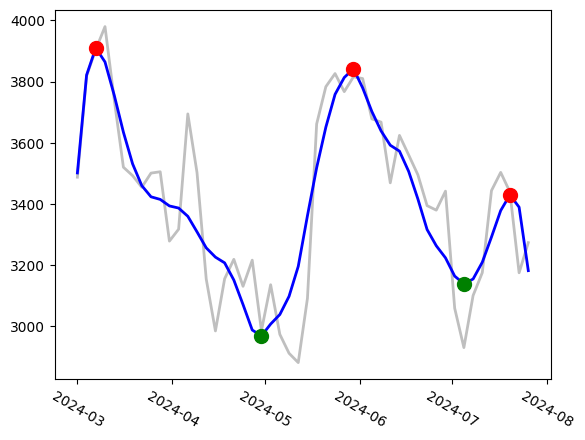

In [9]:
smoothness = 20

def find_extramas(data, window_length = 20, polyorder = 5, distance = 10, width = 1):
    data["close_smooth"] = savgol_filter(data.close, window_length, polyorder)
    peaks_idx, _ = find_peaks(data.close_smooth, distance = distance, width = width) # prominence=atr
    troughs_idx, _ = find_peaks(-1*data.close_smooth, distance = distance, width = width) # prominence=atr
    return peaks_idx, troughs_idx

peaks_idx, troughs_idx = find_extramas(df, smoothness)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df.index, df.close_smooth, c='b', lw=2, zorder=5)

peaks, = ax.plot(df.index[peaks_idx], df.close_smooth.iloc[peaks_idx], c="r", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

troughs, = ax.plot(df.index[troughs_idx], df.close_smooth.iloc[troughs_idx], c="g", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

plt.show()
